In [ ]:
#Info https://rpubs.com/alexmaar/949091

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm # Estadísticas R Adjused
import seaborn as sns  # Gráficos
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # Polinomial

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/Advertising_Web.csv")
datos

,Unnamed: 0,X,TV,Radio,Newspaper,Web,Sales
0,1,1,230.1,37.8,69.2,306.634752,22.1
1,2,2,44.5,39.3,45.1,302.653070,10.4
2,3,3,17.2,45.9,69.3,49.498908,9.3
3,4,4,151.5,41.3,58.5,257.816893,18.5
4,5,5,180.8,10.8,58.4,195.660076,12.9
...,...,...,...,...,...,...,...
195,196,196,38.2,3.7,13.8,248.841073,7.6
196,197,197,94.2,4.9,8.1,118.041856,9.7
197,198,198,177.0,9.3,6.4,213.274671,12.8
198,199,199,283.6,42.0,66.2,237.498063,25.5


In [11]:
print("Observaciones y variables: ", datos.shape)


Observaciones y variables:  (200, 7)


In [13]:
print("Columnas y tipo de dato")
# datos.columns
datos.dtypes

Columnas y tipo de dato


,0
Unnamed: 0,int64
X,int64
TV,float64
Radio,float64
Newspaper,float64
Web,float64
Sales,float64


In [14]:
datos[['TV','Radio', 'Newspaper', 'Web', 'Sales', ]].describe()

,TV,Radio,Newspaper,Web,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,159.587355,14.022500
std,85.854236,14.846809,21.778621,76.815266,5.217457
min,0.700000,0.000000,0.300000,4.308085,1.600000
25%,74.375000,9.975000,12.750000,99.048767,10.375000
50%,149.750000,22.900000,25.750000,156.862154,12.900000
75%,218.825000,36.525000,45.100000,212.311848,17.400000
max,296.400000,49.600000,114.000000,358.247042,27.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


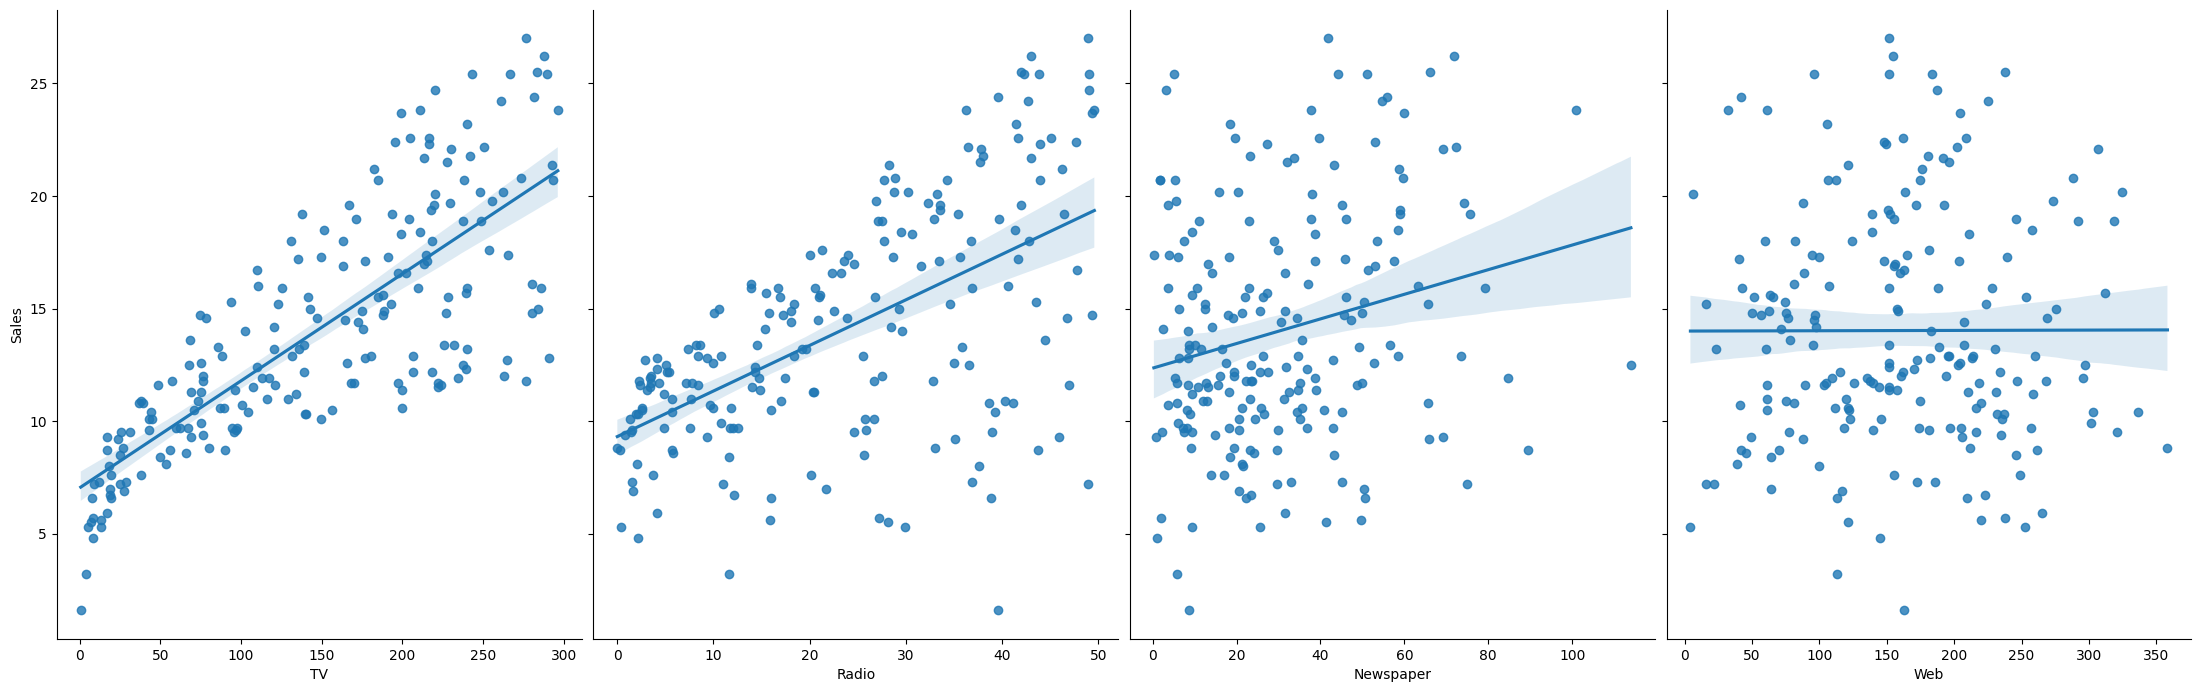

In [15]:
sns.pairplot(datos, x_vars=['TV','Radio','Newspaper', 'Web'], y_vars='Sales', size=7, aspect=0.8,kind = 'reg')

In [17]:
plt.savefig("pairplot.jpg")
plt.show()

<Figure size 640x480 with 0 Axes>

In [19]:
print("Variables independientes ")
X_independientes = datos.iloc[:,2:6]
X_independientes

Variables independientes 


,TV,Radio,Newspaper,Web
0,230.1,37.8,69.2,306.634752
1,44.5,39.3,45.1,302.653070
2,17.2,45.9,69.3,49.498908
3,151.5,41.3,58.5,257.816893
4,180.8,10.8,58.4,195.660076
...,...,...,...,...
195,38.2,3.7,13.8,248.841073
196,94.2,4.9,8.1,118.041856
197,177.0,9.3,6.4,213.274671
198,283.6,42.0,66.2,237.498063


In [20]:
print ("Variable dependiente")
Y_dependiente = datos.iloc[:, 6:7]
Y_dependiente

Variable dependiente


,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [21]:
X_entrena,X_valida,Y_entrena,Y_valida = train_test_split(X_independientes, Y_dependiente,train_size=.80,  random_state=1279)

In [23]:
print("Estructura de datos de entrenamiento... ", X_entrena.shape)
print(X_entrena)

Estructura de datos de entrenamiento...  (160, 4)
        TV  Radio  Newspaper         Web
198  283.6   42.0       66.2  237.498063
123  123.1   34.6       12.4   15.757191
49    66.9   11.7       36.8  205.253501
146  240.1    7.3        8.7   23.496943
4    180.8   10.8       58.4  195.660076
..     ...    ...        ...         ...
40   202.5   22.3       31.6   88.212823
86    76.3   27.5       16.0  193.830894
60    53.5    2.0       21.4   39.217153
155    4.1   11.6        5.7  113.270712
167  206.8    5.2       19.4  115.371957

[160 rows x 4 columns]


In [24]:
print(X_entrena[['TV']], X_entrena[['Radio']], X_entrena[['Newspaper']])

        TV
198  283.6
123  123.1
49    66.9
146  240.1
4    180.8
..     ...
40   202.5
86    76.3
60    53.5
155    4.1
167  206.8

[160 rows x 1 columns]      Radio
198   42.0
123   34.6
49    11.7
146    7.3
4     10.8
..     ...
40    22.3
86    27.5
60     2.0
155   11.6
167    5.2

[160 rows x 1 columns]      Newspaper
198       66.2
123       12.4
49        36.8
146        8.7
4         58.4
..         ...
40        31.6
86        16.0
60        21.4
155        5.7
167       19.4

[160 rows x 1 columns]


In [25]:
modelo_rm = LinearRegression()

modelo_rm.fit(X_entrena,Y_entrena)

LinearRegression()

In [26]:
print ("Intercepción o b0")
b0 = modelo_rm.intercept_
print (b0)

Intercepción o b0
[2.09627196]


In [27]:
print ("Coeficientes: b1, b2, b3 y b4")
b1 = modelo_rm.coef_[0, 0:1]
b2 = modelo_rm.coef_[0, 1:2]
b3 = modelo_rm.coef_[0, 2:3]
b4 = modelo_rm.coef_[0, 3:4]
print (b1, b2, b3, b4)

Coeficientes: b1, b2, b3 y b4
[0.04638778] [0.1931704] [0.00266901] [0.00312985]


In [28]:
print(modelo_rm.score(X_entrena, Y_entrena))

0.8975038824463837


In [29]:
predicciones = modelo_rm.predict(X_valida)
print(predicciones[:-1])

[[23.31545991]
 [ 9.81748186]
 [11.9109256 ]
 [20.01975515]
 [15.09653173]
 [ 6.06120596]
 [ 9.78499417]
 [16.05643214]
 [20.13676067]
 [19.49064826]
 [ 9.71643179]
 [ 8.64439503]
 [17.32486825]
 [16.40376016]
 [20.01054419]
 [14.89640104]
 [18.53382825]
 [ 8.64991603]
 [12.21513748]
 [17.4374653 ]
 [14.27992518]
 [20.99712154]
 [ 4.59998172]
 [ 6.96238685]
 [11.93476381]
 [17.84320853]
 [21.0232409 ]
 [17.24104176]
 [ 7.80360798]
 [16.67268568]
 [18.00600622]
 [ 9.36647273]
 [ 5.5099947 ]
 [18.04803109]
 [15.40298044]
 [14.20565427]
 [21.61120406]
 [ 6.48944946]
 [10.10612156]]


In [31]:
print(predicciones.shape)

(40, 1)


In [34]:
print(type(X_valida))
print(type(predicciones))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [35]:
comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(Sales_Real = Y_valida)
comparaciones = comparaciones.assign(Predicho = predicciones.flatten().tolist())
print(comparaciones)

        TV  Radio  Newspaper         Web  Sales_Real   Predicho
61   261.3   42.7       54.7  224.832039        24.2  23.315460
157  149.8    1.3       24.3  145.803211        10.1   9.817482
148   38.0   40.3       11.9   75.207978        10.9  11.910926
176  248.4   30.2       20.3  163.852044        20.2  20.019755
114   78.2   46.8       34.5   76.770428        14.6  15.096532
189   18.7   12.1       23.4  222.906951         6.7   6.061206
186  139.5    2.1       26.6  236.744035        10.3   9.784994
48   227.2   15.8       49.9   75.269182        14.8  16.056432
104  238.2   34.3        5.3  112.155489        20.7  20.136761
139  184.9   43.9        1.7  106.253829        20.7  19.490648
138   43.0   25.9       20.5  181.368740         9.6   9.716432
191   75.5   10.8        6.0  301.481194         9.9   8.644395
41   177.0   33.4       38.7  147.859324        17.1  17.324868
95   163.3   31.6       52.9  155.594877        16.9  16.403760
109  255.4   26.9        5.5  273.454125

In [36]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(Y_valida, predicciones))

Mean Squared Error: MSE 2.1939716116489665


In [37]:
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(Y_valida, predicciones)))

Root Mean Squared Error RMSE: 1.481206134084303
